In [1]:
import skimage
import skimage.io
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_image(path):
    # load image
    img = skimage.io.imread(path)
    img = img / 255.0
    assert (0 <= img).all() and (img <= 1.0).all()
    # print "Original Image Shape: ", img.shape
    # we crop image from center
    short_edge = min(img.shape[:2])
    yy = int((img.shape[0] - short_edge) / 2)
    xx = int((img.shape[1] - short_edge) / 2)
    crop_img = img[yy: yy + short_edge, xx: xx + short_edge]
    # resize to 224, 224
    resized_img = skimage.transform.resize(crop_img, (224, 224))
    return resized_img

In [3]:
img2 = load_image("./dataset/img/Abstract_Bodycon_Dress/img_00000009.jpg")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[[[0.6        0.53333333 0.70588235]
  [0.6        0.53333333 0.70588235]
  [0.6        0.53333333 0.70588235]
  ...
  [0.6        0.5372549  0.69019608]
  [0.6        0.5372549  0.69019608]
  [0.6        0.5372549  0.69019608]]

 [[0.6        0.53333333 0.70588235]
  [0.6        0.53333333 0.70588235]
  [0.6        0.53333333 0.70588235]
  ...
  [0.6018645  0.5391194  0.69206057]
  [0.6018645  0.5391194  0.69206057]
  [0.6018645  0.5391194  0.69206057]]

 [[0.6        0.53333333 0.70588235]
  [0.6        0.53333333 0.70588235]
  [0.6        0.53333333 0.70588235]
  ...
  [0.60392157 0.54117647 0.69411765]
  [0.60392157 0.54117647 0.69411765]
  [0.60392157 0.54117647 0.69411765]]

 ...

 [[0.65490196 0.60784314 0.75686275]
  [0.65490196 0.60784314 0.75686275]
  [0.65179447 0.60473564 0.75375525]
  ...
  [0.32302779 0.25636112 0.421067  ]
  [0.32754727 0.2608806  0.42558648]
  [0.33271183 0.26604517 0.43075105]]

 [[0.65284489 0.60578606 0.75480567]
  [0.65284489 0.60578606 0.75480567]


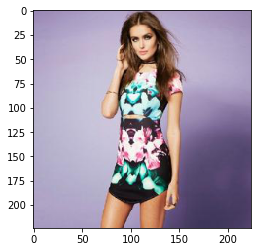

In [4]:

plt.imshow(img2)
print(img2)

In [134]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_path = "./dataset"

In [54]:
cat_list_file = os.path.join(dataset_path, 'Anno/list_category_cloth.txt')
cat_img_file = os.path.join(dataset_path, 'Anno/list_category_img.txt')
attr_list_file = os.path.join(dataset_path, 'Anno/list_attr_cloth.txt')
attr_img_file = os.path.join(dataset_path, 'Anno/list_attr_img.txt')
bbox_file = os.path.join(dataset_path, 'Anno/list_bbox.txt')
eval_file = os.path.join(dataset_path, 'Eval/list_eval_partition.txt')

In [76]:
def get_category_list():
    category_list = pd.read_csv(cat_list_file, sep='\s+', header=1)
    category_list = category_list.join(pd.DataFrame(data=list(range(1,51)), columns=["category_label"]))
    return category_list

In [77]:
get_category_list().head(10)

,category_name,category_type,category_label
0,Anorak,1,1
1,Blazer,1,2
2,Blouse,1,3
3,Bomber,1,4
4,Button-Down,1,5
5,Cardigan,1,6
6,Flannel,1,7
7,Halter,1,8
8,Henley,1,9
9,Hoodie,1,10


In [58]:
def get_image_category():
    return pd.read_csv(cat_img_file, sep='\s+', header=1, engine='python') #, dtype={"image_name": np.string_, "category_label":np.int32})

In [59]:
get_image_category().head(10)

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,3
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,3
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3


In [60]:
def get_attribute_list():
    return pd.read_csv(attr_list_file, sep='\s\s+', header=1, engine='python') #, dtype={"image_name": np.string_, "category_label":np.int32})

In [61]:
get_attribute_list().head(10)

,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1
5,abstract floral,1
6,abstract floral print,1
7,abstract geo,1
8,abstract geo print,1
9,abstract paisley,1


In [24]:
headers = ["image_name"]
np.append(["image_name"], get_attribute_list().get("attribute_name").values)

array(['image_name', 'a-line', 'abstract', ..., 'zipped', 'zipper',
       'zippered'], dtype=object)

In [68]:
def get_image_attributes(attribute_list):
    return pd.read_csv(attr_img_file, sep='\s+', names=np.append(["image_name"], attribute_list), skiprows=2, engine='python') #, dtype={"image_name": np.string_, "category_label":np.int32})

In [32]:
get_image_attributes().head(10)

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,image_name,attribute_labels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [71]:
def get_image_eval():
    return pd.read_csv(eval_file, sep='\s+', header=1, engine='python') #, dtype={"image_name": np.string_, "category_label":np.int32})

In [72]:
get_image_eval().head(10)

,image_name,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,val
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,test
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,train
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,train
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,train


In [78]:
def get_data():
    category_list = get_category_list()
    image_category = get_image_category()
    attribute_list = get_attribute_list()
    image_attributes = get_image_attributes(attribute_list.get("attribute_name").values)
    category_list = get_category_list()
    data = image_category
    data = data.merge(category_list, on="category_label", how="left")
    data = data.merge(image_attributes, on="image_name", how="outer")
    image_eval = get_image_eval()
    data = data.merge(image_eval, on="image_name", how="left")
    return data

In [79]:
data = get_data()
data.head(10)

,image_name,category_label,category_name,category_type,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,...,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,test
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,val
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,test
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train


In [89]:
# Eval type is either, train, test or eval.
def filter_by_eval_type(data, eval_type):
    return data[data['evaluation_status']==eval_type]

In [158]:
# Dividing data into training, test and eval
training_data = filter_by_eval_type(data, "train")
test_data = filter_by_eval_type(data, "test")
val_data = filter_by_eval_type(data, "val")
training_data.head(10)

,image_name,category_label,category_name,category_type,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,...,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
10,img/Sheer_Pleated-Front_Blouse/img_00000011.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
11,img/Sheer_Pleated-Front_Blouse/img_00000012.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
13,img/Sheer_Pleated-Front_Blouse/img_00000014.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
15,img/Sheer_Pleated-Front_Blouse/img_00000016.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train


In [121]:
# Category None implies all categories to be used to generate the dataset.
def filter_by_category(data, category_list):
    return data[data["category_name"].isin(category_list)]

In [122]:
cat_list = ["Blouse", "Kaftan"]
train_cats = filter_by_category(training_data, cat_list)
train_cats

,image_name,category_label,category_name,category_type,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,...,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
10,img/Sheer_Pleated-Front_Blouse/img_00000011.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
11,img/Sheer_Pleated-Front_Blouse/img_00000012.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
13,img/Sheer_Pleated-Front_Blouse/img_00000014.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
15,img/Sheer_Pleated-Front_Blouse/img_00000016.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train


In [ ]:
# Category None implies all categories to be used to generate the dataset.
def filter_by_percent_category(data, catagory):
    category_list = get_category_list()
    data = get_data()

In [127]:
# Category None implies all categories to be used to generate the dataset.
def filter_by_percent(data, percent):
    return data.sample(frac=percent/100.0)

In [129]:
filter_by_percent(train_cats, 60)

,image_name,category_label,category_name,category_type,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,...,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered,evaluation_status
18196,img/Embroidered_Mesh_Gauze_Blouse/img_00000014...,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
21320,img/Flutter_Self-Tie_Blouse/img_00000063.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
479,img/Shirred_Lace-Paneled_Blouse/img_00000052.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
23908,img/Beaded_Laser-Cut_Blouse/img_00000073.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
23984,img/Abstract_Dotted_Blouse/img_00000041.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
31502,img/Ruffled_Floral_Blouse/img_00000097.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
4765,img/Three-Button_Flat_Collar_Blouse/img_000000...,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
9490,img/Chiffon_Curved_Hem_Blouse/img_00000096.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
20356,img/Floral_Flutter_Sleeve_Blouse/img_00000087.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train
18850,img/Angular_Colorblock_Blouse/img_00000041.jpg,3,Blouse,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,train


In [163]:
# Total samples
print(data.shape[0])
print(training_data.shape[0])
print(test_data.shape[0])
print(val_data.shape[0])

289222
209222
40000
40000


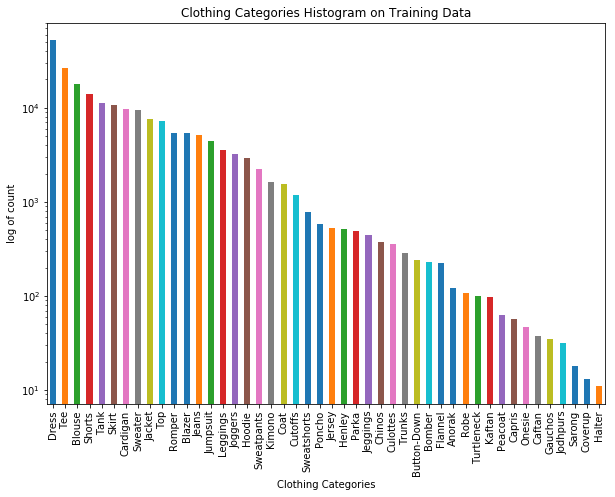

In [155]:
# Plot number of traning samples by category
plt.figure(figsize=(10,7))
ax = training_data["category_name"].value_counts().plot(kind='bar', logy=True)
ax.set_ylabel("log of count")
ax.set_xlabel("Clothing Categories")
ax.set_title("Clothing Categories Histogram on Training Data")
plt.show()

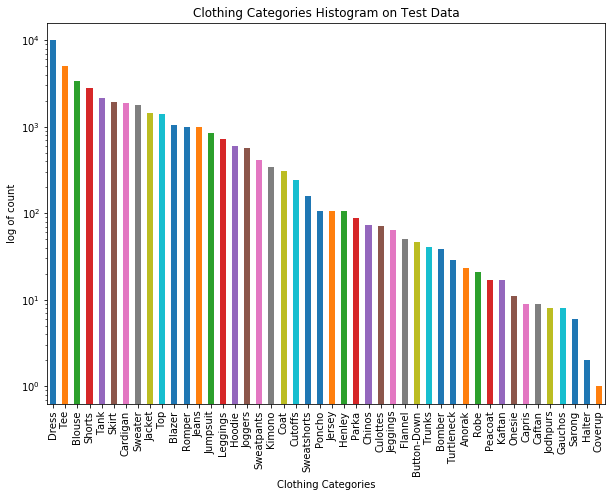

In [156]:
# Plot number of test samples by category
plt.figure(figsize=(10,7))
ax = test_data["category_name"].value_counts().plot(kind='bar', logy=True)
ax.set_ylabel("log of count")
ax.set_xlabel("Clothing Categories")
ax.set_title("Clothing Categories Histogram on Test Data")
plt.show()

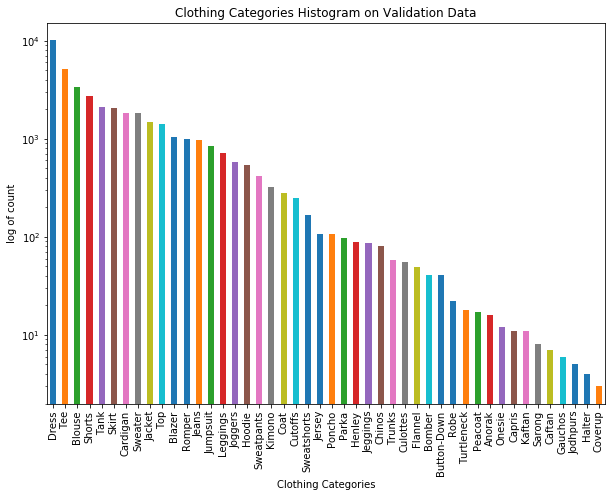

In [159]:
# Plot number of validation samples by category
plt.figure(figsize=(10,7))
ax = val_data["category_name"].value_counts().plot(kind='bar', logy=True)
ax.set_ylabel("log of count")
ax.set_xlabel("Clothing Categories")
ax.set_title("Clothing Categories Histogram on Validation Data")
plt.show()

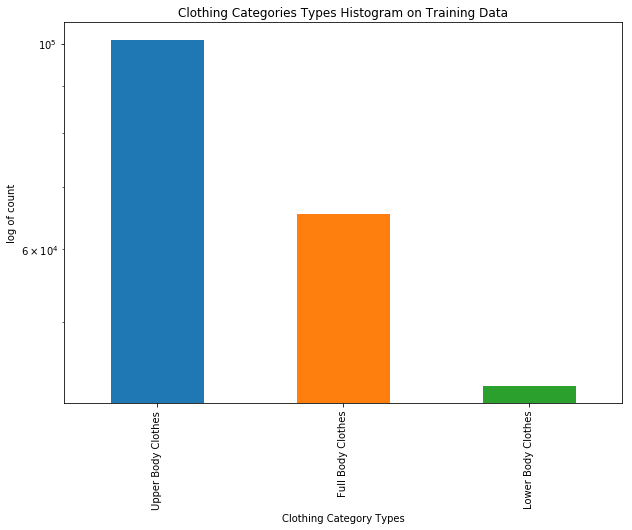

In [164]:
# Plot number of traning samples by category_type
plt.figure(figsize=(10,7))
ax = training_data["category_type"].value_counts().plot(kind='bar', logy=True)
ax.set_ylabel("log of count")
ax.set_xlabel("Clothing Category Types")
plt.xticks([0, 1, 2], ["Upper Body Clothes", "Full Body Clothes", "Lower Body Clothes"])
ax.set_title("Clothing Categories Types Histogram on Training Data")
plt.show()

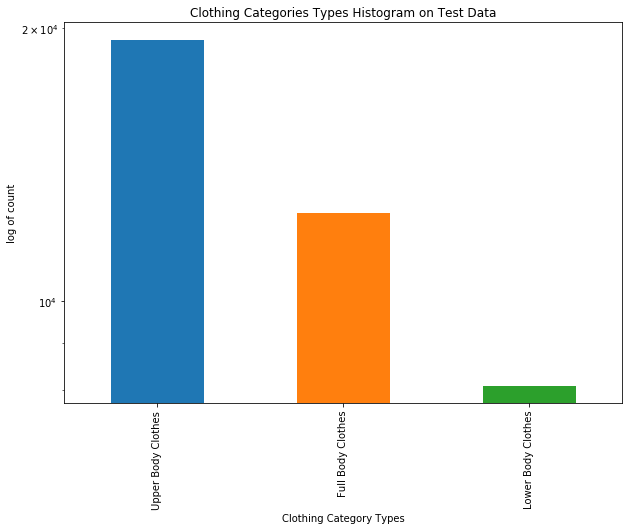

In [165]:
# Plot number of test samples by category_type
plt.figure(figsize=(10,7))
ax = test_data["category_type"].value_counts().plot(kind='bar', logy=True)
ax.set_ylabel("log of count")
ax.set_xlabel("Clothing Category Types")
plt.xticks([0, 1, 2], ["Upper Body Clothes", "Full Body Clothes", "Lower Body Clothes"])
ax.set_title("Clothing Categories Types Histogram on Test Data")
plt.show()

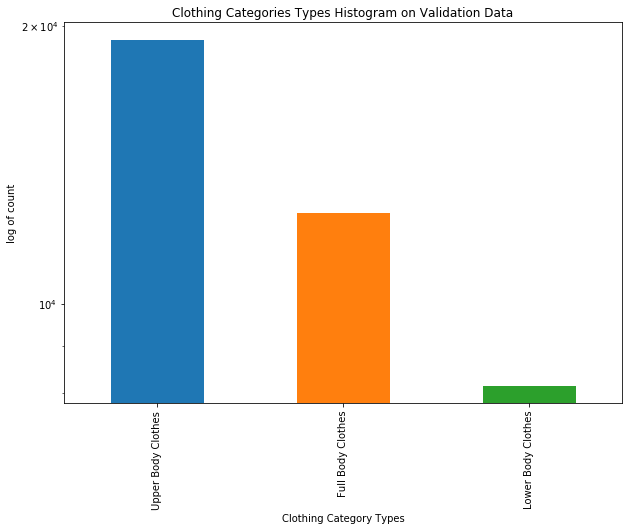

In [166]:
# Plot number of validation samples by category_type
plt.figure(figsize=(10,7))
ax = val_data["category_type"].value_counts().plot(kind='bar', logy=True)
ax.set_ylabel("log of count")
ax.set_xlabel("Clothing Category Types")
plt.xticks([0, 1, 2], ["Upper Body Clothes", "Full Body Clothes", "Lower Body Clothes"])
ax.set_title("Clothing Categories Types Histogram on Validation Data")
plt.show()

In [43]:
get_category_list().count().get("category_name")

50